## Graphic dashboard - facebook

In [12]:
import pandas as pd

DATA = "data/meta.csv"

def rm_sign(serie: str) -> float:
    """Return the given serie without the first char."""

    return float(serie[1:])

def lmbd(column):
    return lambda x: x[column].map(rm_sign)

# Setting up the dataframe.
df = pd.read_csv(
    DATA,
    parse_dates=["Date"],
    dayfirst=True,
    infer_datetime_format=True,
    index_col="Date",
    engine="python",

# Renaming a column, so it can be work on.
).rename(columns={
    "Close/Last": "CloseLast"
}

# Removing the dollar sign.
).sort_index().assign(
    CloseLast = lmbd("CloseLast"), 
    Open = lmbd("Open"), 
    High = lmbd("High"),
    Low = lmbd("Low"),
    CloseLast_mean = lambda x: x["CloseLast"].rolling("14D").mean(),  
)

# Showing the dataframe.
df

,CloseLast,Volume,Open,High,Low,CloseLast_mean
Date,,,,,,
2017-07-18,162.86,23686800,159.660,163.7300,159.4200,162.860000
2017-07-19,164.14,26144510,163.590,165.7000,163.1700,163.500000
2017-07-20,164.53,18409730,164.800,165.0000,162.8100,163.843333
2017-07-21,164.43,14712450,164.160,165.0500,163.7500,163.990000
2017-07-24,166.00,17208500,164.640,166.1700,164.3100,164.392000
...,...,...,...,...,...,...
2022-07-11,162.88,21905130,167.065,167.4900,161.9100,165.534444
2022-07-12,163.27,16639660,164.800,165.9107,162.1000,165.822222
2022-07-13,163.49,16555140,160.160,164.9800,159.6127,165.772222


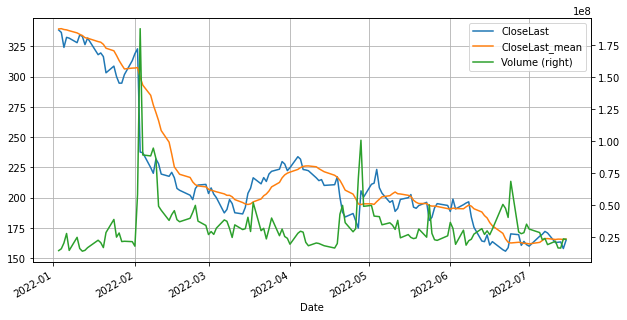

In [13]:
from_ = "2022"
to = "2022"

# Creating and runnning the dashboard.
df.loc[from_: to].plot(
    y = ["CloseLast", "CloseLast_mean", "Volume"],
    figsize = [10,5],
    secondary_y = ["Volume"],
    grid=True,
    
);